# 프로잭트 요구사항



*   반드시 들어가야 하는 내용

1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다. 
2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

*   Data Description

1. Name : 게임의 이름입니다.
2. Platform : 게임이 지원되는 플랫폼의 이름입니다.
3. Year : 게임이 출시된 연도입니다.
4. Genre : 게임의 장르입니다.
5. Publisher : 게임을 제작한 회사입니다.
6. NA_Sales : 북미지역에서의 출고량입니다.
7. EU_Sales : 유럽지역에서의 출고량입니다.
8. JP_Sales : 일본지역에서의 출고량입니다.
9. Other_Sales : 기타지역에서의 출고량입니다

# EDA(데이터 전처리)

**데이터 블러오기**



In [36]:
import pandas as pd
from google.colab import files
df = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [37]:
!sudo apt-get install -y fonts-NanumGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-NanumGothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [38]:
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'



In [39]:
df = pd.read_csv('vgames2.csv').drop(columns=['Unnamed: 0'], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
16322,F.E.A.R. Perseus Mandate,PC,2007,Shooter,Vivendi Games,0.01,0.00,0,0.00,0.01
16323,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0,0.00,0.01
16324,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0,0.00,0.01
16325,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0,0.00,0,0.00,0.00


In [40]:
#df.isnull().sum() #결측치 갯수 확인
#결측치 제거 //결측치가 전체 데이터 16598 개중에 379개 이므로 총 2.28%에 해당하기떄문에 전체 제거 
df = df.dropna()
#각 지역별 판매량 단위 균일화 하기 단위 M을 1로 가정하여 나머지 값 정렬
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype('float')
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype('float')
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype('float')
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype('float')
#Year, Sales 은 숫자형으로 타입 변경
#df['Year'] = df['Year'].astype(int)
df['Year'] = pd.to_numeric(df['Year'])
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])


In [41]:
#Year col 에 자릿수를 4자리로 통일시켜주는 함수 생성
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)


In [42]:
df.head(12)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Platform, Year, Genre, Publisher 확인

In [43]:
num_Platform = df['Platform'].unique()
print(len(num_Platform))
num_Platform

31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [44]:
num_Year = df['Year'].unique()
num_Year

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [45]:
num_Genre = df['Genre'].unique()
print(len(num_Genre))
num_Genre

12


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [46]:
num_Publisher = df['Publisher'].unique()
print(len(num_Publisher))
num_Publisher

580


array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Square Enix', 'Eidos Interactive',
       'RedOctane', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Hasbro Interactive', 'Palcom', 'THQ',
       'Fox Interactive', 'Acclaim Entertainment', 'MTV Games',
       'Disney Interactive Studios', 'Majesco Entertainment',
       'Codemasters', 'Red Orb', 'Level 5', 'Arena Entertainment',
       'Midway Games', 'JVC', 'Deep Silver', '989 Studios', 'NCSoft',
       'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic',
       'ASCII Entertainment', 'Valve Software', 'Tecmo Koei'

Total Sales 생성

In [47]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16322,F.E.A.R. Perseus Mandate,PC,2007,Shooter,Vivendi Games,0.01,0.00,0.00,0.00,0.01,0.01
16323,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01,0.01
16324,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.01
16325,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.00,0.00


# 장르 별 전체 판매량

In [48]:
df_genre = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Total_Sales']]
df_genre.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']
df_group = df_genre.groupby(['Genre']).sum()
df1 = df_group.reset_index()
df1.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']
df1.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,856.46,513.07,156.42,183.88,1709.83
1,Adventure,101.30,63.53,51.20,16.65,232.68
2,Fighting,219.60,99.13,87.04,35.95,441.72
3,Misc,393.66,207.54,103.94,72.44,777.58
4,Platform,444.37,200.22,130.30,51.36,826.25


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


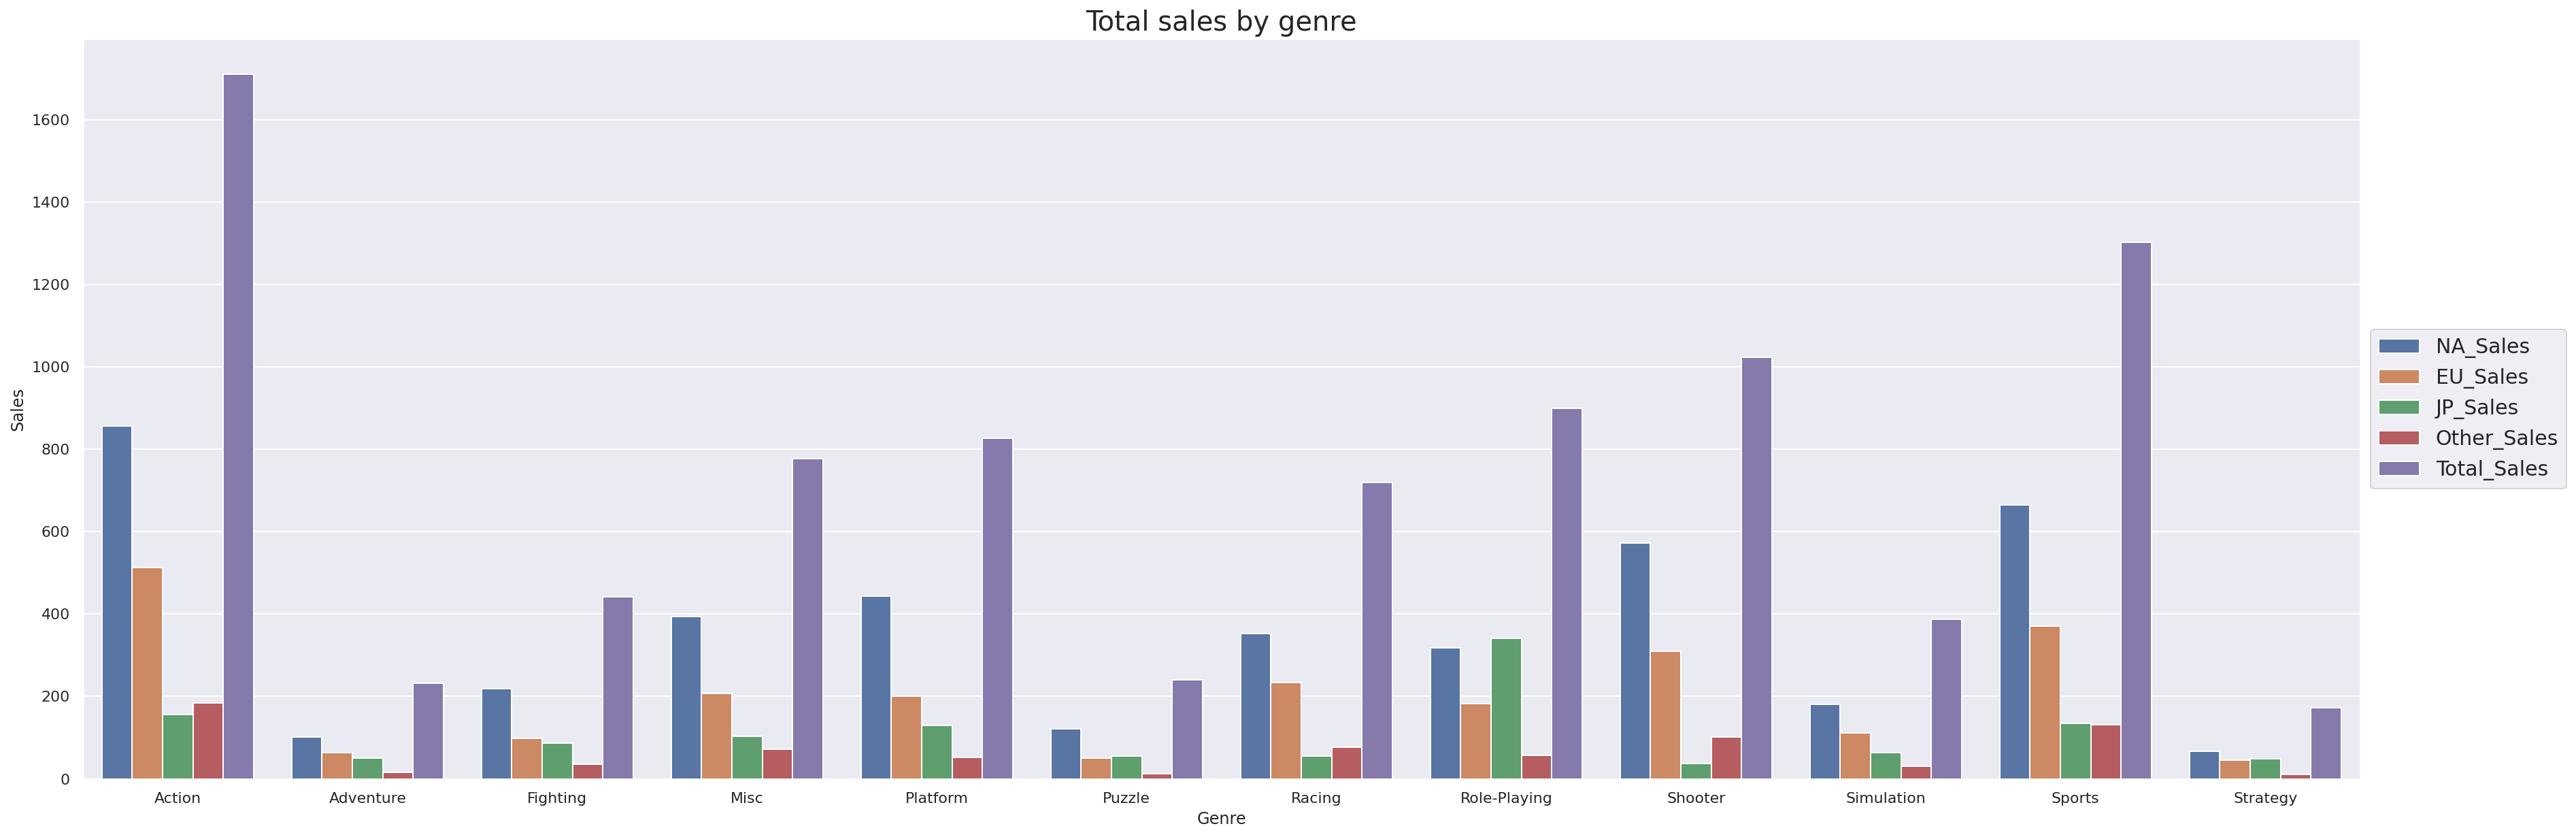

In [49]:
df1_melt = pd.melt(df1, id_vars = ['Genre'], value_vars = df1.columns[1:], var_name = 'Country', value_name= 'Sales')
plt.figure(figsize=(30, 10));
ax = sns.barplot(x='Genre', y='Sales', hue='Country', data=df1_melt)
ax.set_title('Total sales by genre', fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.show()

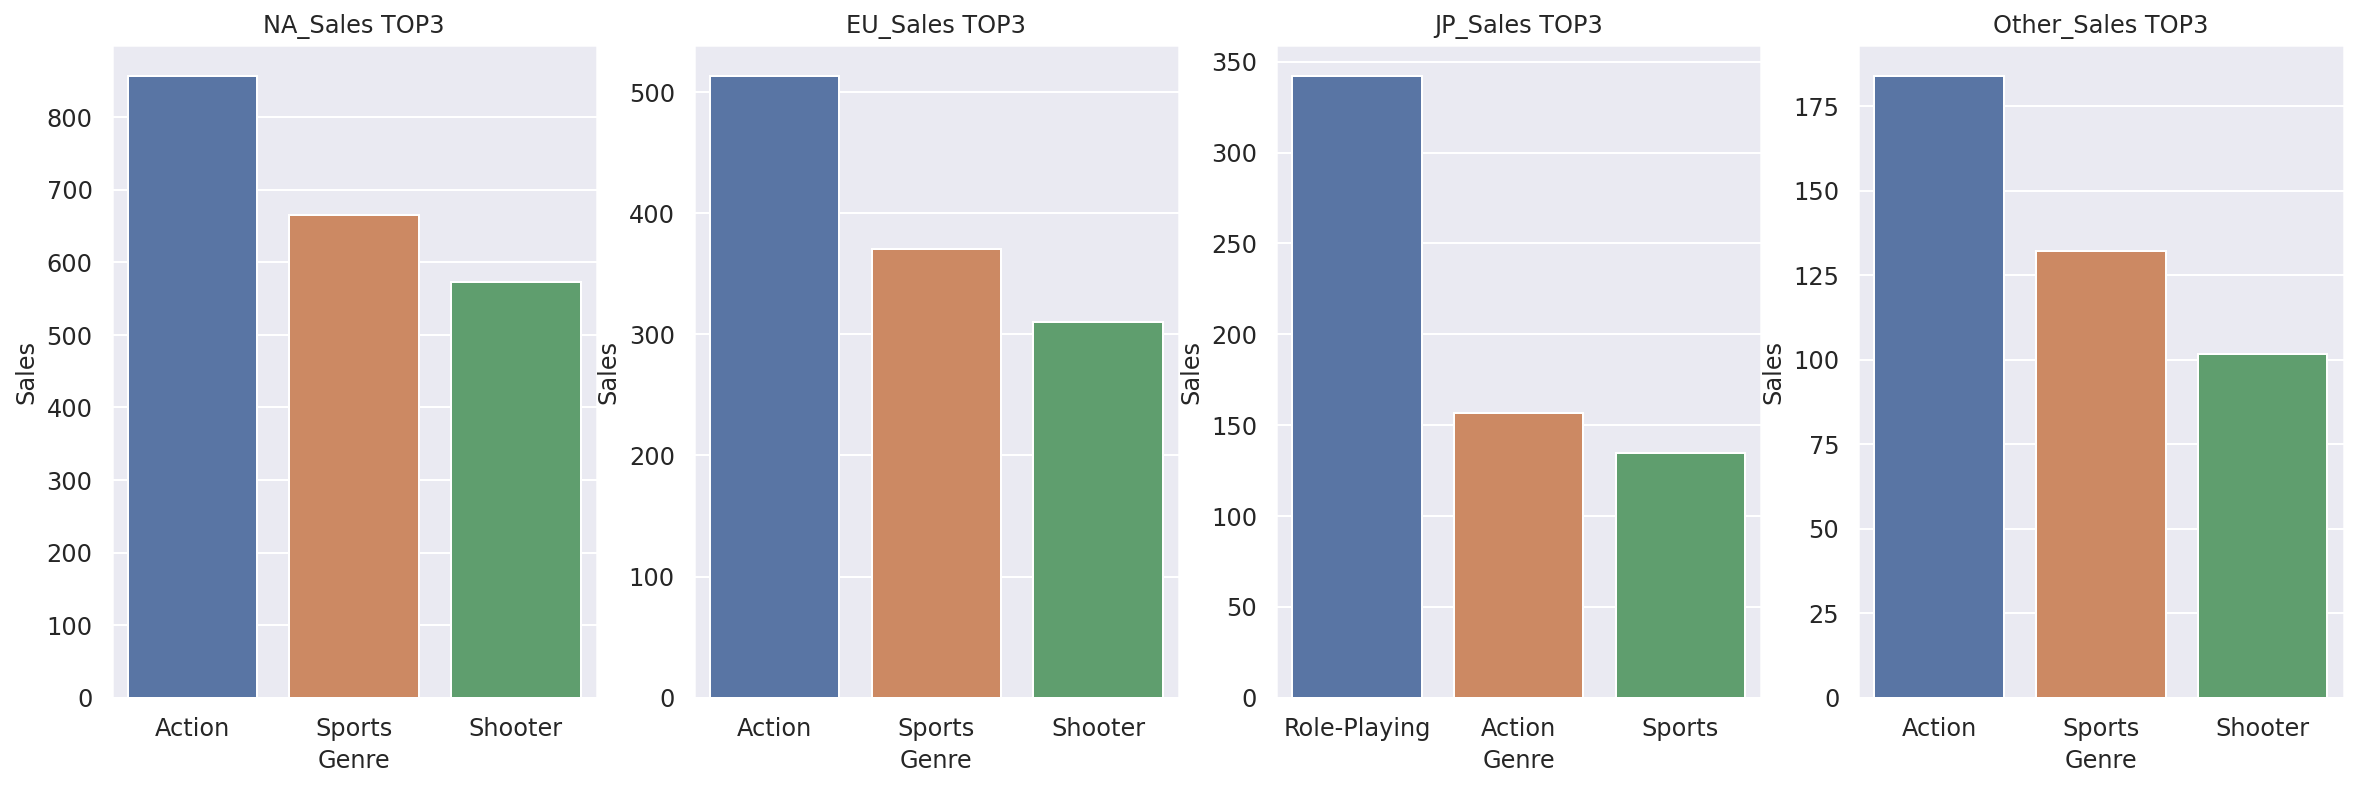

In [50]:
# 국가별 판매량 TOP3
def top3_genre(df, sales_col):
    new_df = df1.loc[:, ['Genre', sales_col]].sort_values(by = sales_col, ascending = False).reset_index(drop = True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

# Top3 데이터 저장
na_genre_top3 = top3_genre(df1, 'NA_Sales')
eu_genre_top3 = top3_genre(df1, 'EU_Sales')
jp_genre_top3 = top3_genre(df1, 'JP_Sales')
other_genre_top3 = top3_genre(df1, 'Other_Sales')
# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = df1.columns[1:]
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(20, 6), nrows = 1, ncols = 4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize = 12)
    sns.barplot(x = 'Genre', y = 'Sales', data = data, ax = axs[i])
    axs[i].tick_params(axis='both',labelsize=12)
    axs[i].set_xlabel('Genre', fontsize=12)
    axs[i].set_ylabel('Sales', fontsize=12)
plt.show()

지역별 전체 판매 순위는 Action > Sports > Shooter > Role-Playing 인 반면 JP 

1.   보라색은 장르별 누적판매량이다 보다시피 Action > Sports > Shooter > Role-Playing 순으로 가장 많이 판매 되었다.
2.   지역별 전체 판매 순위는 Action > Sports > Shooter > Role-Playing 인 반면 JP에서만 Role-Playing 가장 우수하다



# 년도 별 게임 트렌드

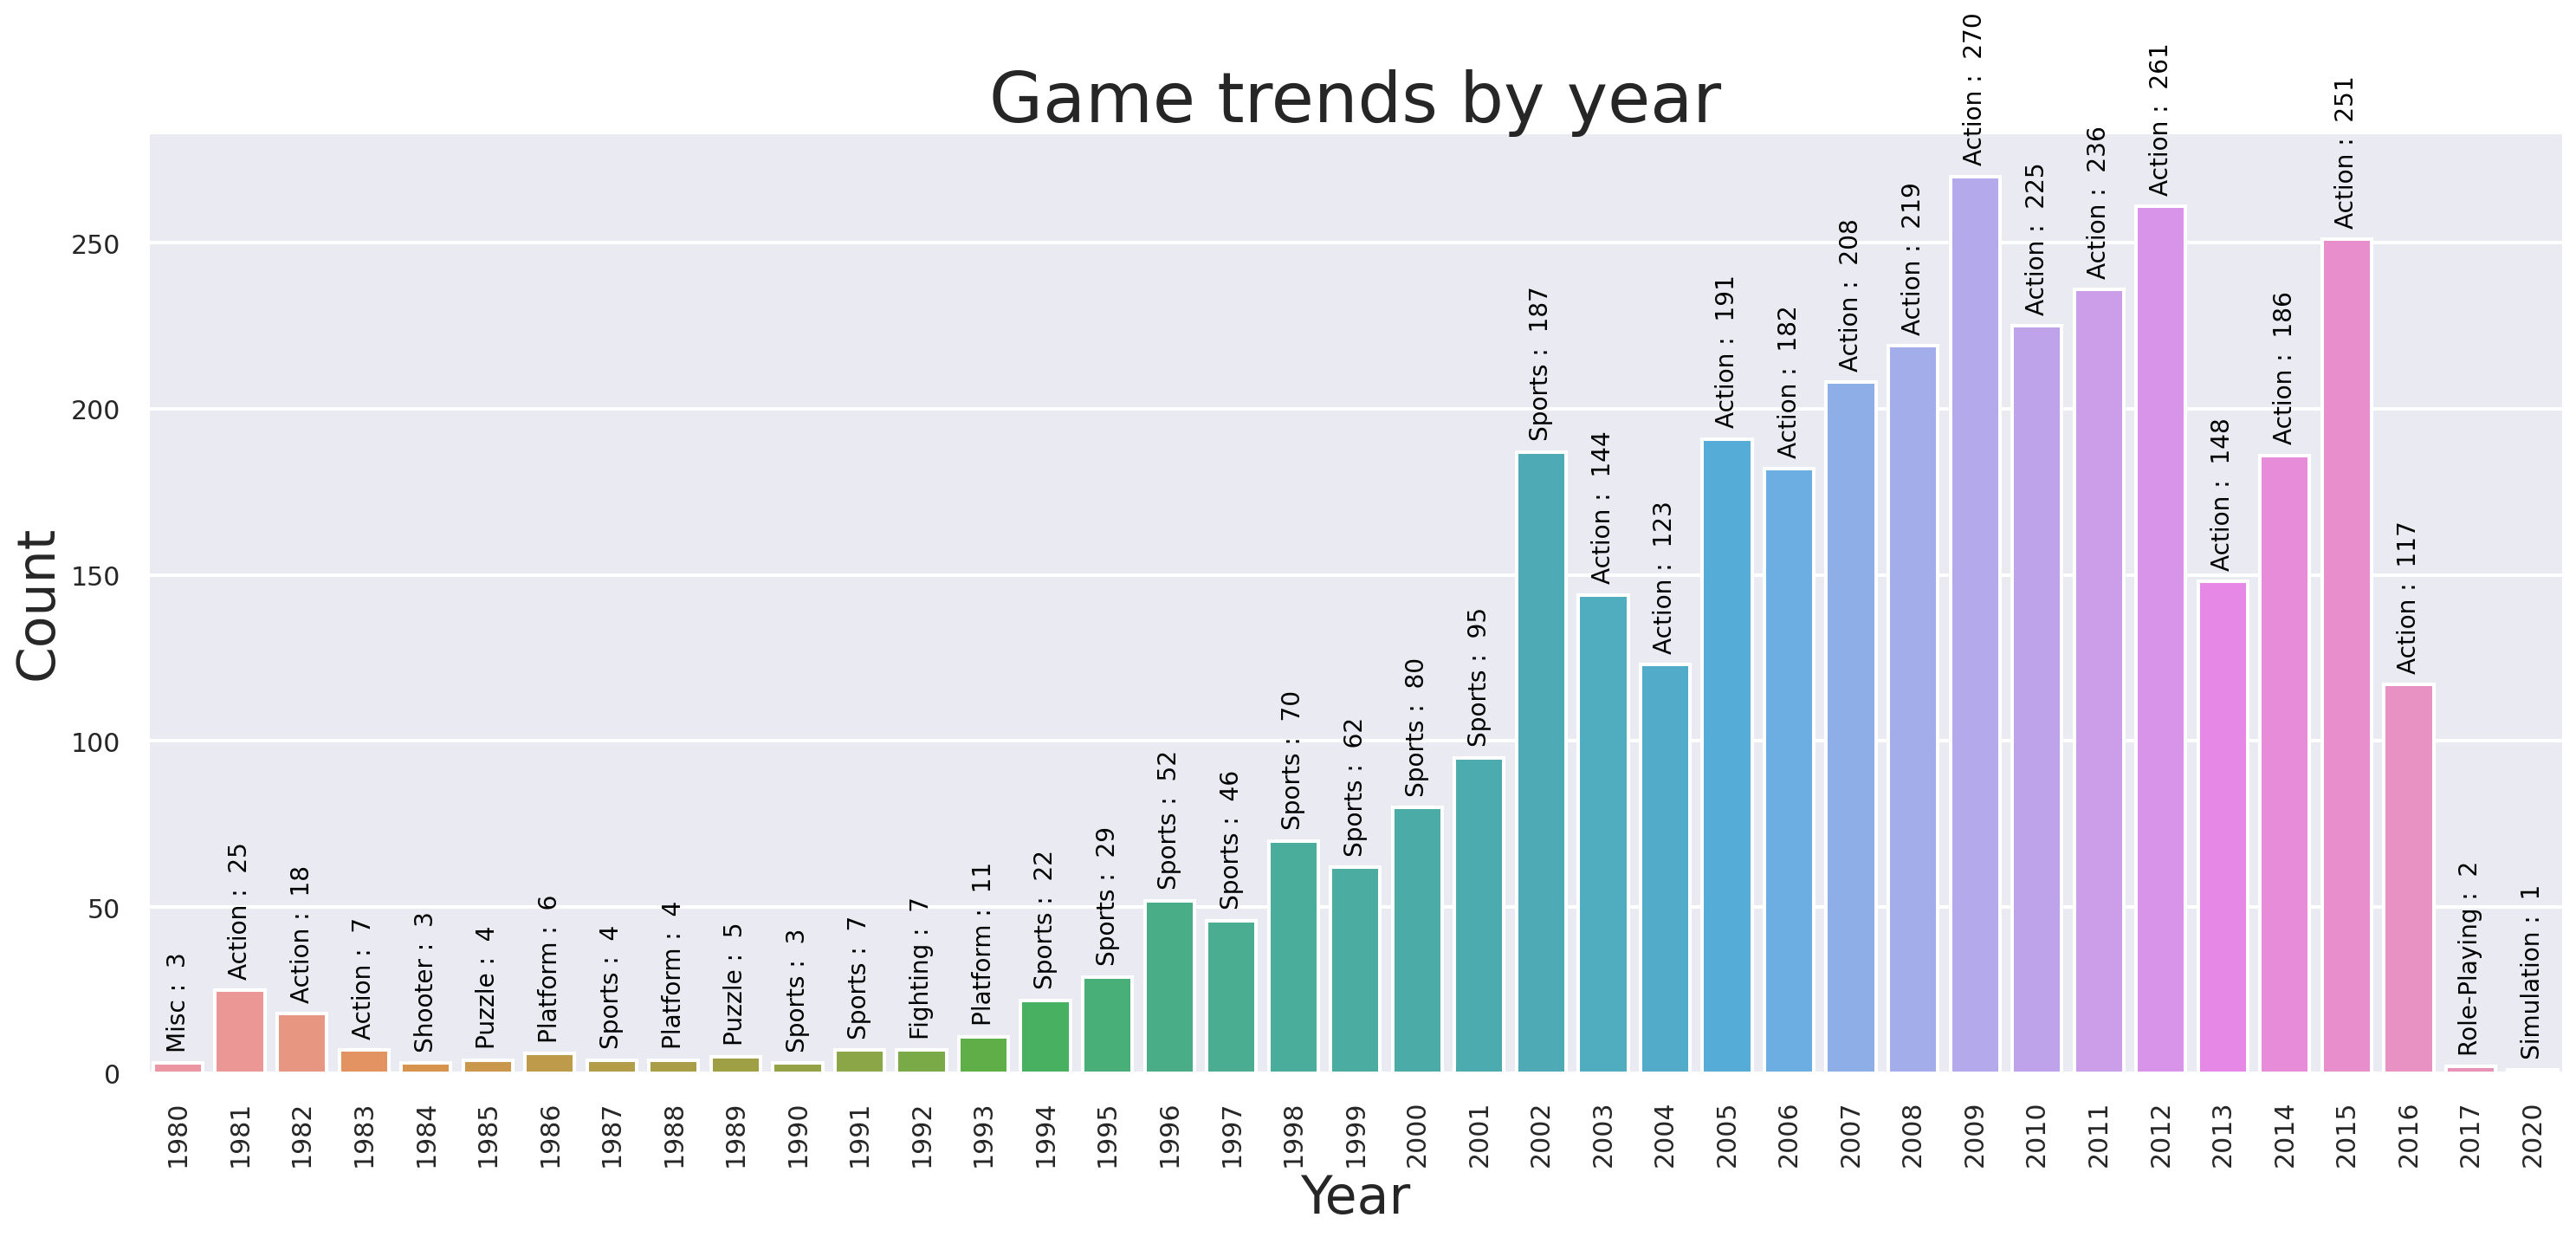

In [51]:
# 년도별 장르 갯수
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name = 'Count')
# 가장 값이 큰 값만 뽑기
year_max_idx = year_max_df.groupby(['Year'])['Count'].transform(max) == year_max_df['Count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop = True)
# 중복값 제외하기
year_max_genre = year_max_genre.drop_duplicates(subset = ['Year','Count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['Year', 'Genre', 'Count']
genre = year_max_genre['Genre'].values

sns.set_context("poster", font_scale = 1.25)
sns.set_style('darkgrid')

plt.figure(figsize=(25,10))
ax = sns.barplot(x='Year', y='Count', data=year_max_genre) # linewidth = 8 , edgecolor=".6" 선명도  hue = "Genre"
idx = 0
for value in year_max_genre['Count']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + ' : ' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Count', fontsize=30)
ax.set_title('Game trends by year', fontsize=40, y=1, loc='center')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.show()

*   1990년대~2000년대 초반에는 다양한 판매가 이루어지며 수요는 높지 않다
*   2000년도 부터 수요가 급증하면서 초반에는 Sports 장르가 게임의 트렌드로 자리잡았다
*   이후 Action 장르가 게임의 트렌드로 되며 수요가 급격하게 늘어남


# 게임별 판매 순위

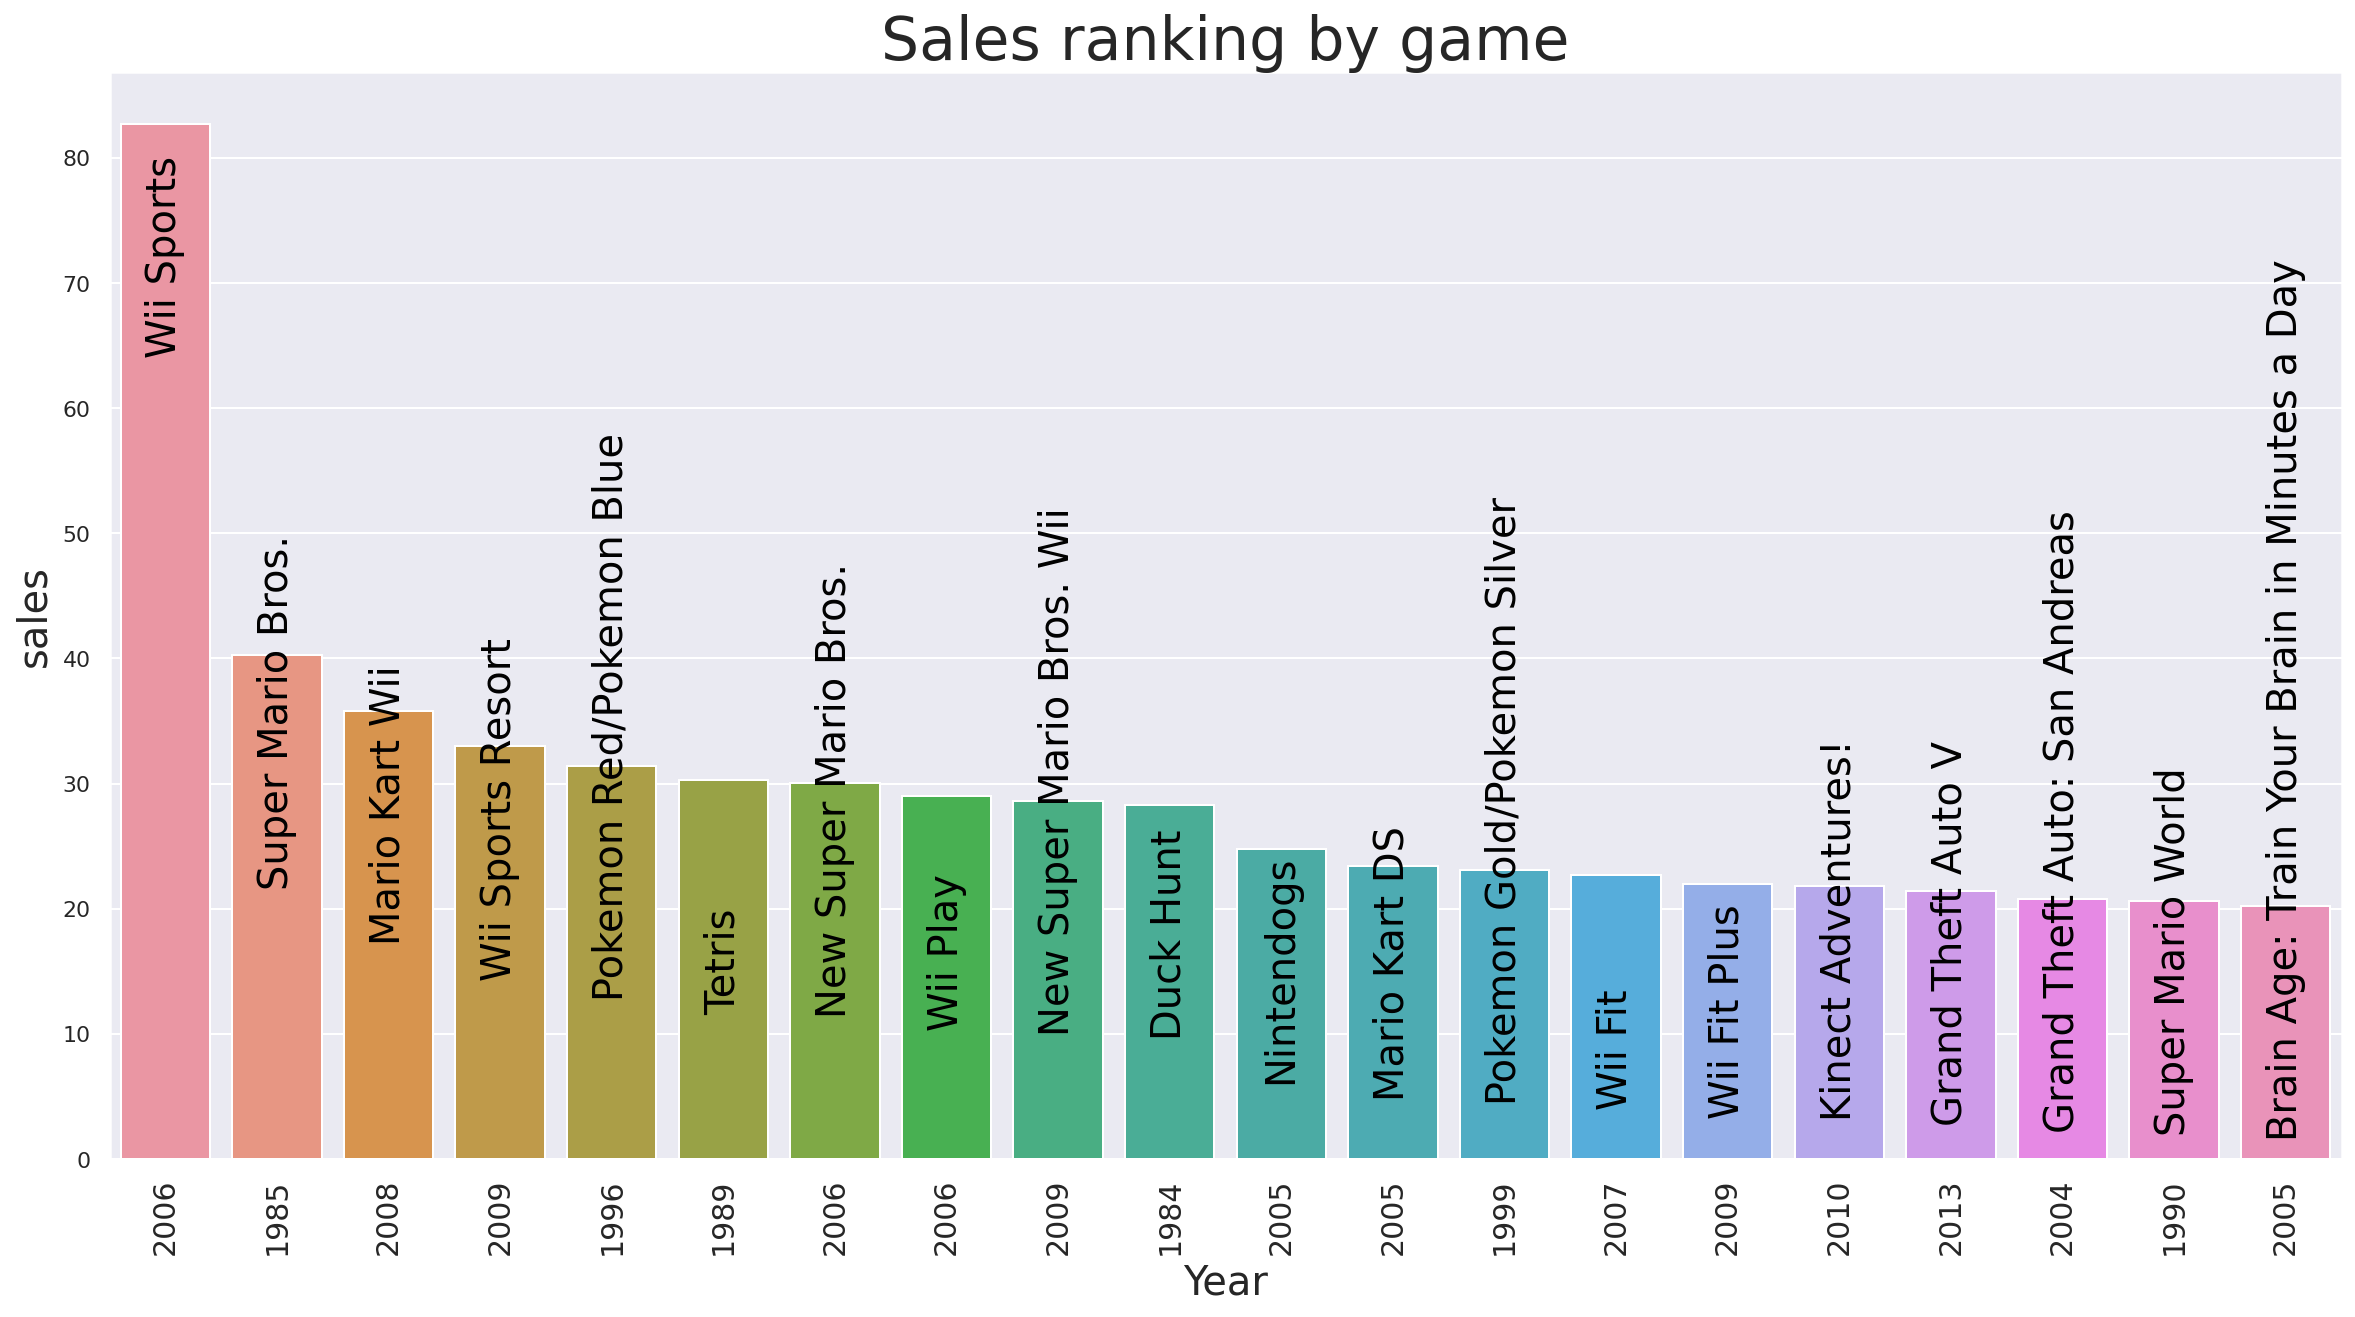

In [63]:
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
#top_game_sale

#Publisher

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(20, 10))
g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Total_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=15, rotation=90)
plt.title("Sales ranking by game", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("sales", fontsize=20)
plt.show()



*   가장 많은 판매를 기록한 Wii Sports 가 압도적인 1위이다.



# 년도별 가장 많이 팔린 플렛폼


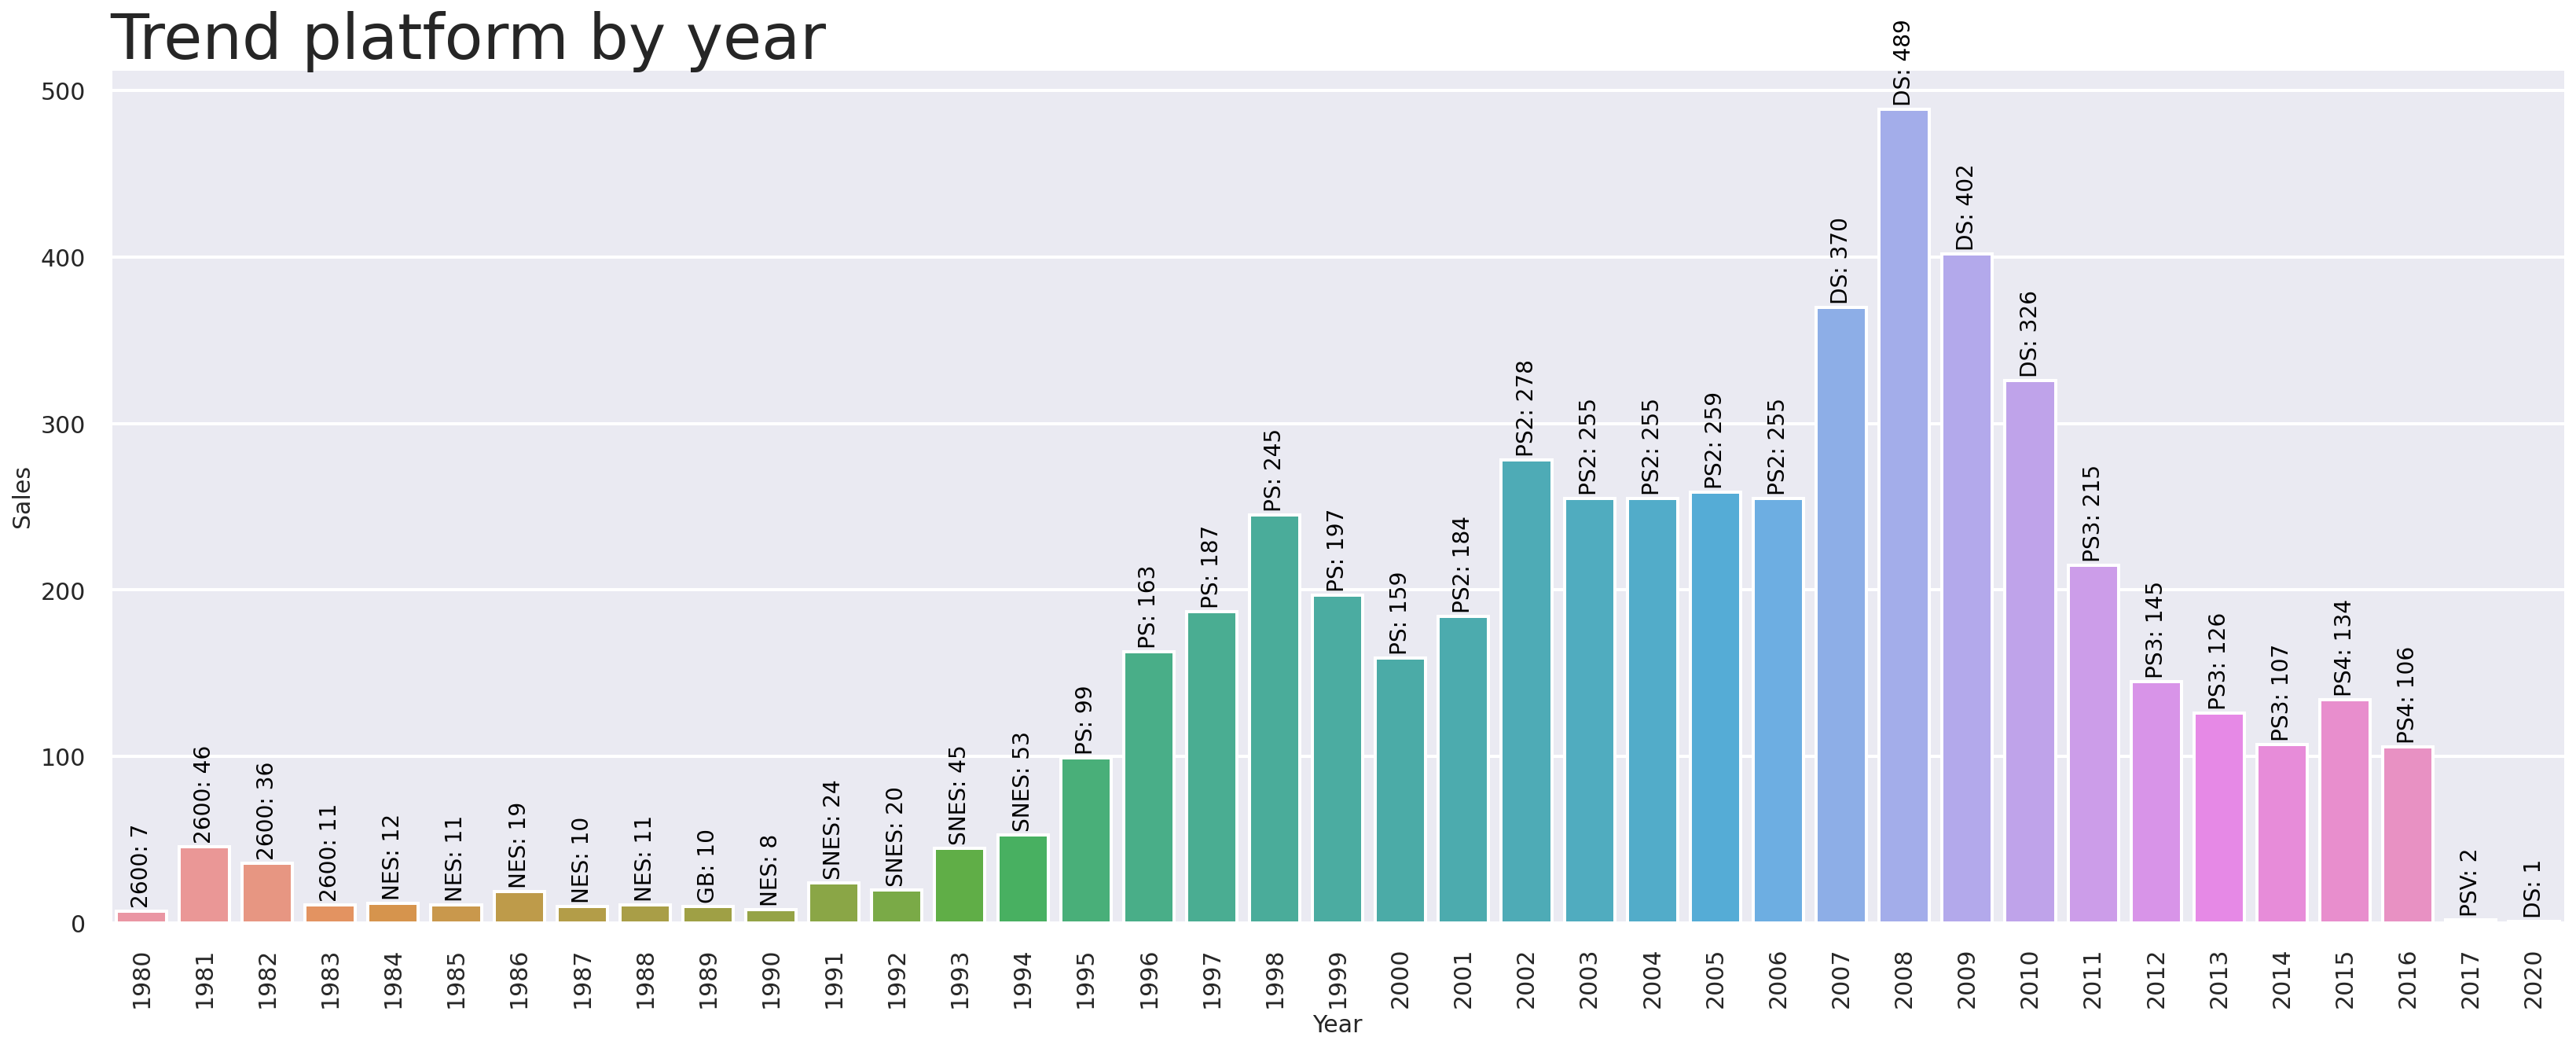

In [53]:
# 년도별 플랫폼 갯수
year_max_pf = df.groupby(['Year', 'Platform']).size().reset_index(name='count')
# 가장 값이 큰 값만 뽑기
condition = year_max_pf.groupby(['Year'])['count'].transform(max) == year_max_pf['count']
year_max_pf = year_max_pf[condition].reset_index(drop=True)
# 중복값 제외하기
year_max_pf = year_max_pf.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_pf.columns = ['Year', 'Platform', 'Sales']

# 플랫폼값 할당
platform = year_max_pf['Platform'].values

# 그래프 그리기
plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Sales', data=year_max_pf)
idx = 0
for value in year_max_pf['Sales']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + ':' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
ax.set_title('Trend platform by year', fontsize=40, y=1, loc='left')
plt.show()

# 출고량이 높은 게임 

**Wii Sports의 지역별 판매량**

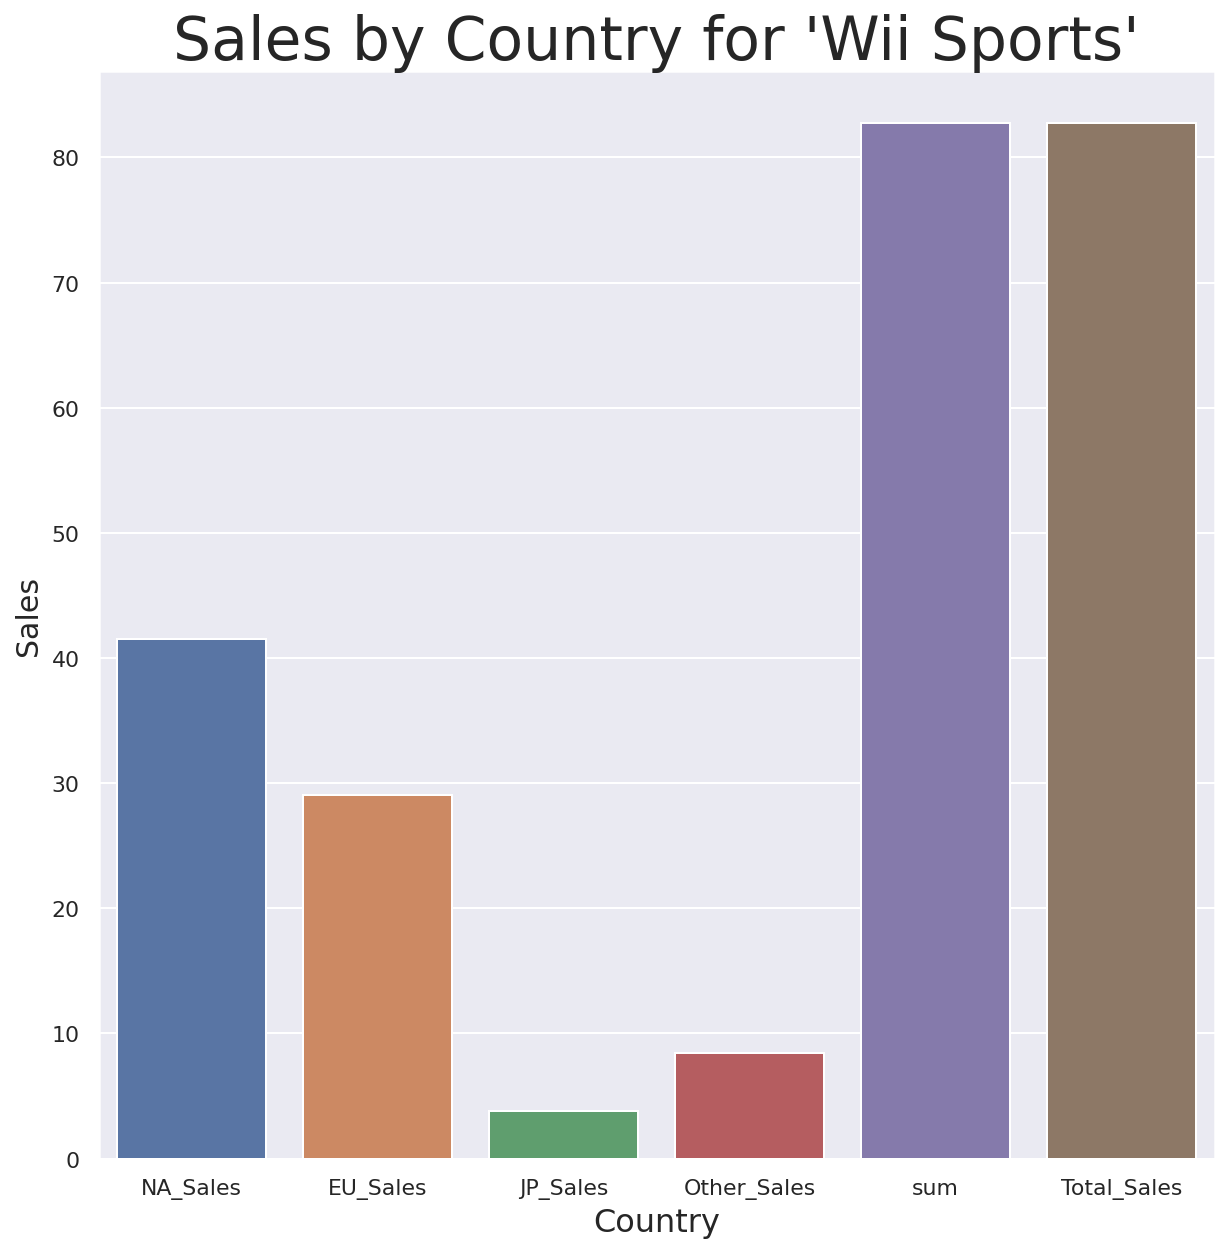

In [55]:
df_wiiSports = df[df['Name'] == 'Wii Sports']
df_wiiSports = df_wiiSports.drop(['Year'], axis=1)
sns.set(style='darkgrid')
plt.figure(figsize=(10, 10))
plt.title("Sales by Country for 'Wii Sports'", fontsize=30)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Sales", fontsize=15)

sns.barplot(data=df_wiiSports);

1.   Wii Sports는 총 판매량의 절반이상이 미국에서 판매되어 있는걸로 미국에서 큰 인기를 끌었던 게임이다.
2.   나머지 지역 판매량을 모두 합쳐야 미국의 판매량과 비슷하다.



**출고량 TOP 6 의 같은 시리즈의 출고량**

In [56]:
Pokemonlist = [79.08, 49.71, 64.44, 9.21, 202.44] #Pokemon 시리즈
GTAlist = [73.81, 54.78, 3.77, 29.26, 161.62] #Grand Theft Auto 시리즈
SMBlist = [82.34, 31.46, 32.06, 7.99, 153.85] #Super Mario Bros 시리즈
WiiSportlist = [57.43, 40.17, 7.09, 11.45, 116.114] #Wii Sport 시리즈
MarioKlist = [33.51, 20.14, 15.98, 4.05, 73.68] #Mario Kart 시리즈
Tetrislist = [35.97, 6.5, 9.64, 1.53, 53.64] #Tetris 시리즈

series = pd.DataFrame({'Pokemon': Pokemonlist, 'GTA': GTAlist, 'Super Mario Bros': SMBlist, 'Wii Sports': WiiSportlist, 'Mario Kart': MarioKlist, 'Tetris': Tetrislist}, index=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'])
series

,Pokemon,GTA,Super Mario Bros,Wii Sports,Mario Kart,Tetris
NA_Sales,79.08,73.81,82.34,57.430,33.51,35.97
EU_Sales,49.71,54.78,31.46,40.170,20.14,6.50
JP_Sales,64.44,3.77,32.06,7.090,15.98,9.64
Other_Sales,9.21,29.26,7.99,11.450,4.05,1.53
Total_Sales,202.44,161.62,153.85,116.114,73.68,53.64


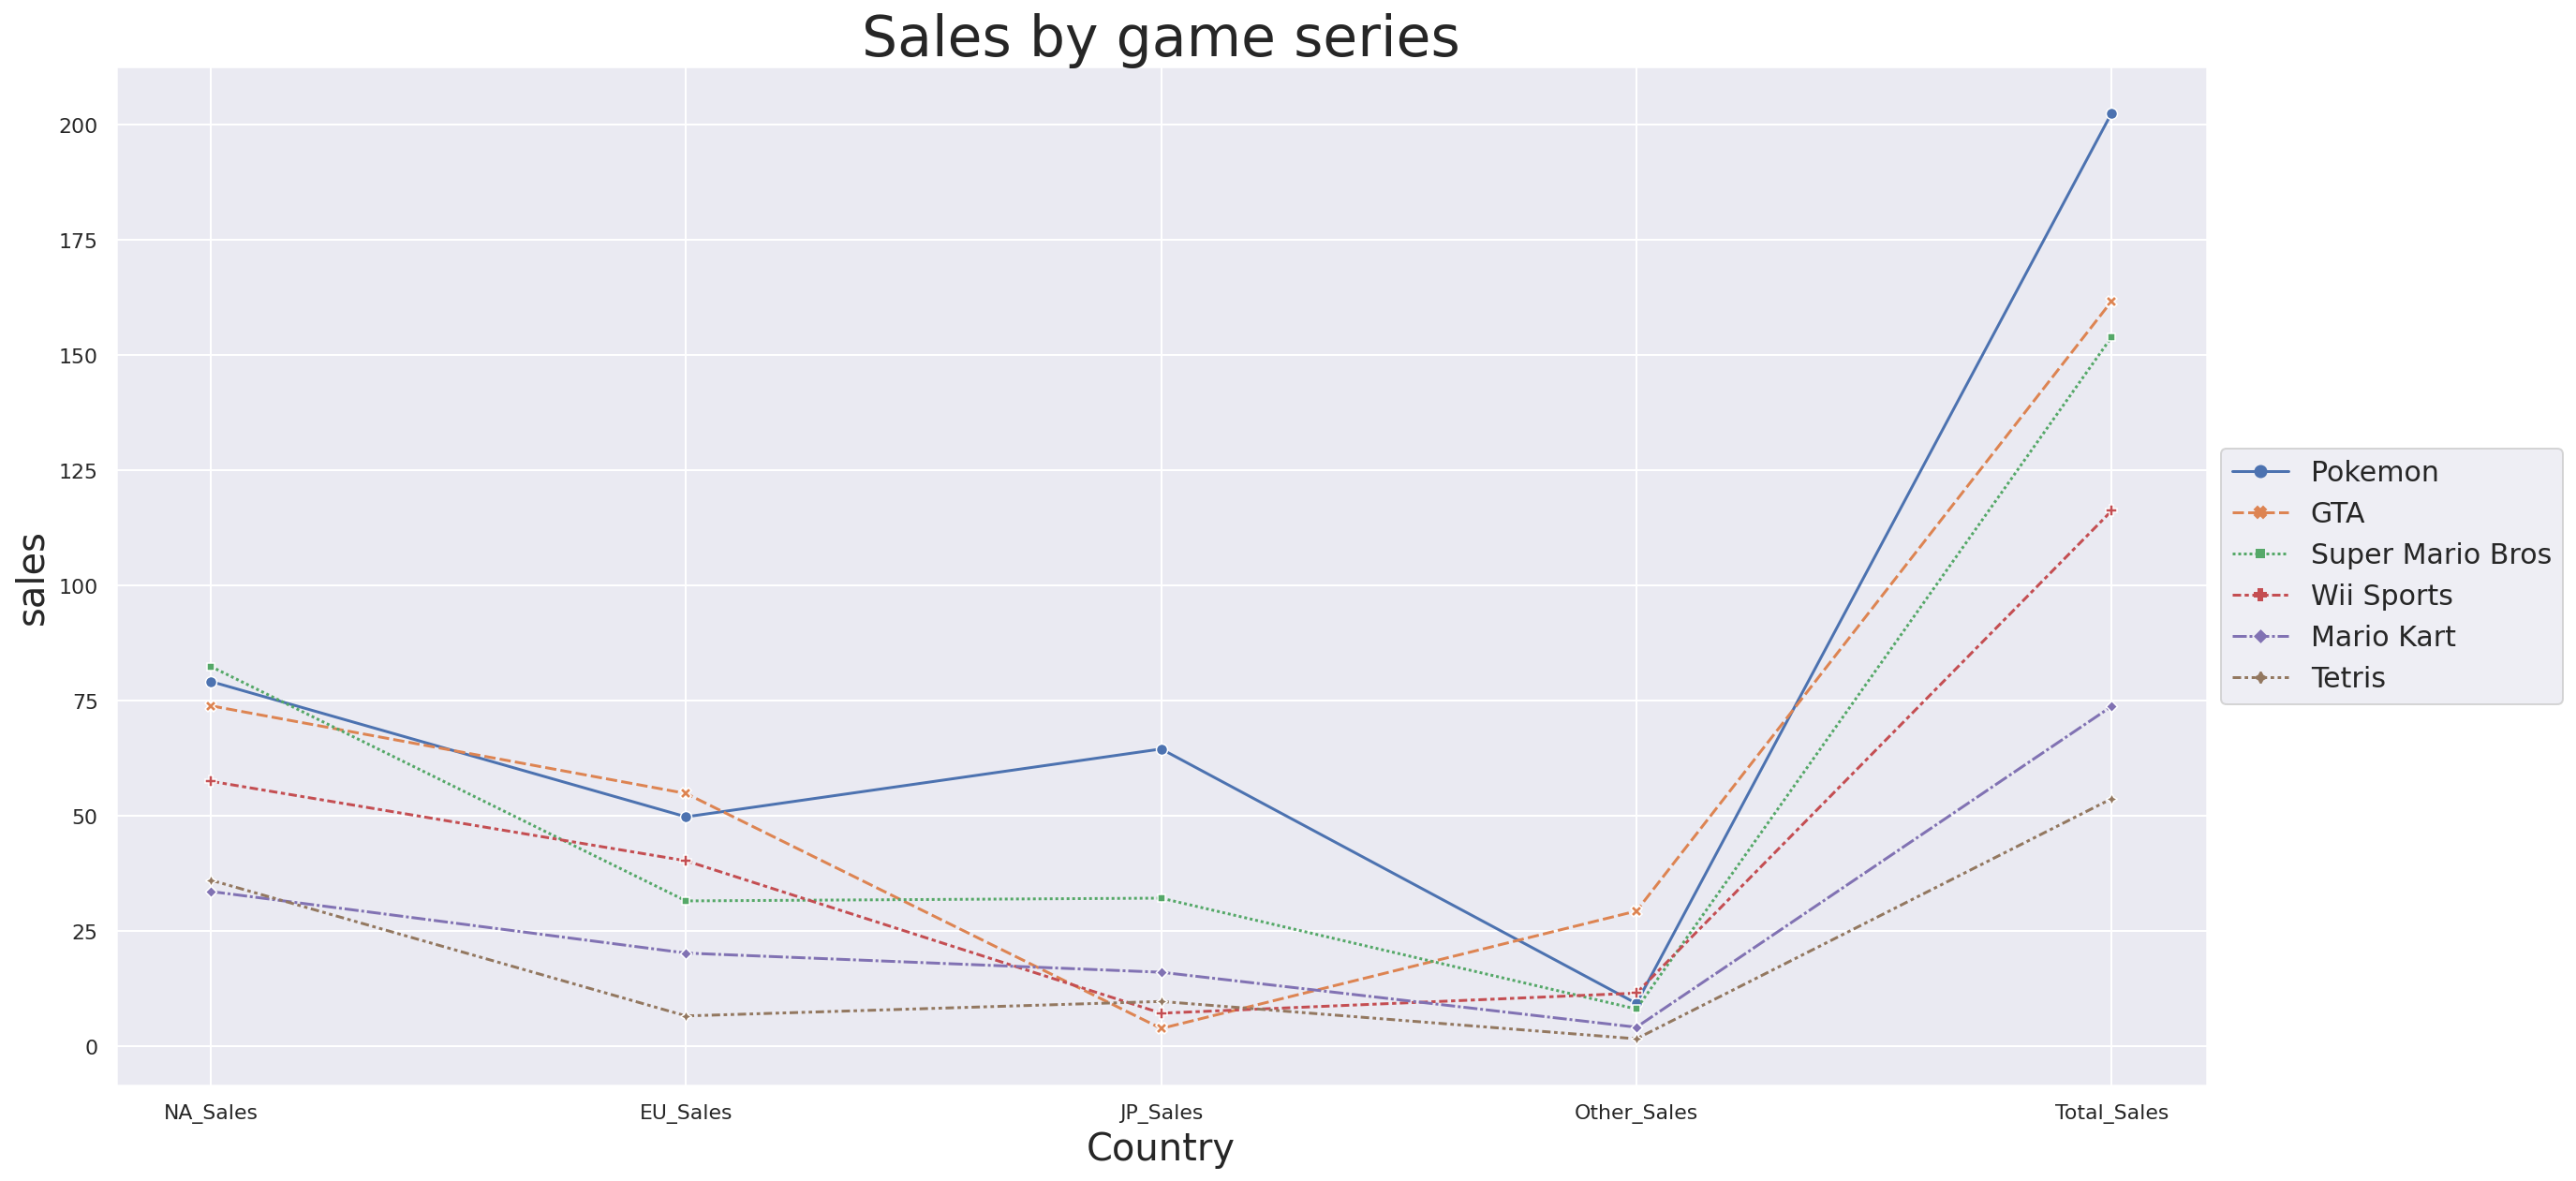

In [57]:
sns.set(style='darkgrid')
plt.figure(figsize=(20, 10))
plt.title("Sales by game series", fontsize=30)
plt.xlabel("Country", fontsize=20)
plt.ylabel("sales", fontsize=20)
aa = sns.lineplot(data=series, markers=True);
aa.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15);




*    출고량이 높은 게임과 같은 시리즈들의 총 판매량을 시각화 하면 이와 같다.
*    단일 로는 Wii sports 가 가장 높은 판매량을 가졌지만 시리즈가 3개 뿐이라  총 판매은4위 인걸로 나타난다.
*   포켓몬, GTA, Super mario Bros 순으로 많이 팔렸으며 이들은 시리즈가 많아 판매량이 분산되어 있어 이들을 합치면 가장 많은 판매량을 가진것으로 보인다.



